# EDA

### Цель работы:  
 - Определение параметров модели, предсказывающей результаты государственного экзамена по математике на основе информации об условиях жизни учащихся.

### Задачи:
 - Первичный анализ данных, 
 - Очистка данных, 
 - Оценка количества уникальных значений для категориальных переменных,
 - Анализ распределения численных признаков, устранение выбросов, 
 - Анализ категориальных переменных и их отбор для дальнейшего построения модели. 

## import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

## Загрузка данных

In [45]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [4]:
df = pd.read_csv('stud_math.csv')

In [92]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

#### Унифицируем названия колонок

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

### Оценка количества пропусков в данных

In [57]:
Mat_of_none = pd.DataFrame(df.isna())
Mat_of_none.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
# Заменим True и False на 1 и 0 соответственно
for column in df.columns:
    Mat_of_none[column] = Mat_of_none[column].map({True: 1, False: 0})
Mat_of_none.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# Найдём сумму единиц для каждой строки датафрейма
Mat_of_none['nonecount']=''
for i in Mat_of_none.index:
    sum_ones = 0
    for column in df.columns:
        sum_ones+= Mat_of_none[column][i]
    Mat_of_none['nonecount'][i] = sum_ones
Mat_of_none.head()

/home/alyona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score,nonecount
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
Mat_of_none['nonecount'].value_counts() #распределение пропусков в строках датафрейма

1    131
2     98
0     97
3     47
4     15
5      5
6      2
Name: nonecount, dtype: int64

##### Вывод: Строк с большим количеством пропусков в датафрейме нет.

## Первичный анализ данных

### Бинарные категориальные признаки

### scool

#### В столбце нет пропусков

#### Распределение значений

In [7]:
School = pd.DataFrame(df.school.value_counts())
School

,school
GP,349
MS,46


([<matplotlib.patches.Wedge at 0x7f1d228315d0>,
 [Text(-1.0271995431128091, 0.3935239492443079, 'GP'),
  Text(1.0271995707460848, -0.39352387711428577, 'MS')])

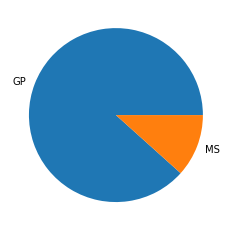

In [63]:
fig, ax = plt.subplots()
ax.pie(School['school'], labels = School.index)

#### Вывод:  Подавляющее большинство учащихся посещает школу GP.

### sex

#### В столбце нет пропусков

#### Распределение значений

In [64]:
Sex = pd.DataFrame(df.sex.value_counts())
Sex

,sex
F,208
M,187


([<matplotlib.patches.Wedge at 0x7f1d227f3590>,
 [Text(-0.09175509895664602, 1.096166502779325, 'F'),
  Text(0.09175520158716051, -1.096166494188588, 'M')])

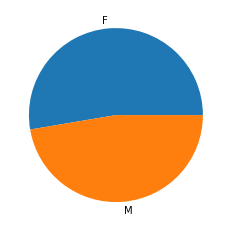

In [65]:
fig, ax = plt.subplots()
ax.pie(Sex['sex'], labels = Sex.index)

#### Вывод: Юношей и девушек примерно поровну среди учащихся


### address

#### В столбце есть пропуски

In [8]:
# заполним пропуски в столбце значением None
df['address'] = df['address'].fillna('None')

#### Распределение значений

In [92]:
Address = pd.DataFrame(df.address.value_counts())
Address

,address
U,295
R,83
None,17


([<matplotlib.patches.Wedge at 0x7f08d63af610>,
 [Text(-0.7700463490546454, 0.7855116932978219, 'Городской житель'),
  Text(0.6571344731694495, -0.882141873041015, 'Сельский житель'),
  Text(1.0899606997968774, -0.14827566522629892, 'Неизвестно')])

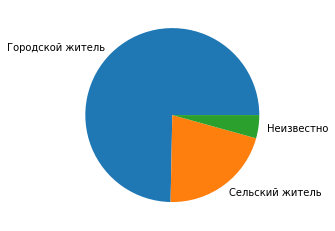

In [93]:
# изменим индекс для наглядности
Address.index = Address.index.map({"U": "Городской житель", 
                                   "R": "Сельский житель", 
                                   "None": "Неизвестно"}) 
fig, ax = plt.subplots()
ax.pie(Address['address'], labels = Address.index)

#### Вывод: Учащихся из города подавляющее большинство


### famsize

#### В столбце есть пропуски

In [9]:
# заполним пропуски в столбце значением None
df['famsize'] = df['famsize'].fillna('None')

#### Распределение значений

In [94]:
Famsize = pd.DataFrame(df.famsize.value_counts())
Famsize

,famsize
GT3,261
LE3,107
None,27


([<matplotlib.patches.Wedge at 0x7f08d637be90>,
 [Text(-0.5322275495808799, 0.9626701592275166, 'Больше 3-х человек в семье'),
  Text(0.314862729579486, -1.0539741275390757, '3 человека в семье или менее'),
  Text(1.074734600180147, -0.2344046483660681, 'Неизвестно')])

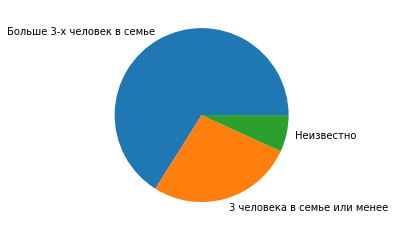

In [95]:
# изменим индекс для наглядности
Famsize.index = Famsize.index.map({"GT3":"Больше 3-х человек в семье", 
                                   "LE3": "3 человека в семье или менее", 
                                   "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Famsize['famsize'], labels = Famsize.index)

#### Вывод: Большинство учащихся живёт в семьях, где больше 3-х человек.

### pstatus

#### В столбце есть пропуски

In [10]:
# заполним пропуски в столбце значением None
df['pstatus'] = df['pstatus'].fillna('None')

#### Распределение значений

In [96]:
Pstatus = pd.DataFrame(df.pstatus.value_counts())
Pstatus

,pstatus
T,314
None,45
A,36


([<matplotlib.patches.Wedge at 0x7f08d62d2590>,
 [Text(-0.8795217999236438, 0.6606371193469787, 'Родители проживают вместе'),
  Text(0.6571343699293418, -0.8821419499477209, 'Неизвестно'),
  Text(1.0552179349994857, -0.31066881023917, 'Родители проживают раздельно')])

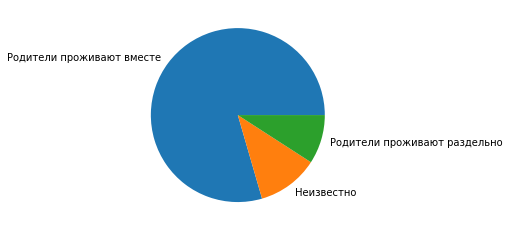

In [97]:
# изменим индекс для наглядности
Pstatus.index = Pstatus.index.map({"T":"Родители проживают вместе", 
                                   "A": "Родители проживают раздельно", 
                                   "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Pstatus['pstatus'], labels = Pstatus.index)

#### Вывод: Большинство родителей учащихся проживают вместе.

### schoolsup

#### В столбце есть пропуски

In [11]:
# заполним пропуски в столбце значением None
df['schoolsup'] = df['schoolsup'].fillna('None')

#### Распределение значений

In [98]:
Schoolsup = pd.DataFrame(df.schoolsup.value_counts())
Schoolsup

,schoolsup
no,335
yes,51
None,9


([<matplotlib.patches.Wedge at 0x7f08d629ee10>,
 [Text(-0.9771108620486608, 0.5052270413057116, 'Нет поддержки школы'),
  Text(0.9384750966256705, -0.5738157308870492, 'Есть поддержка школы'),
  Text(1.0971831214845968, -0.0786714556196642, 'Неизвестно')])

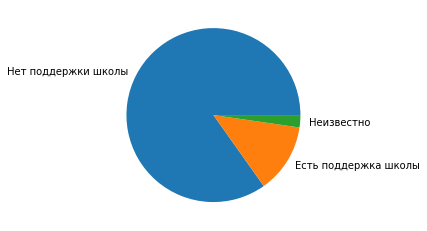

In [99]:
# изменим индекс для наглядности
Schoolsup.index = Schoolsup.index.map({"yes":"Есть поддержка школы", 
                                       "no": "Нет поддержки школы", 
                                       "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Schoolsup['schoolsup'], labels = Schoolsup.index)

#### Вывод: У подавляющего большинства учащихся поддержки школы нет.

### famsup

#### В столбце есть пропуски

In [12]:
# заполним пропуски в столбце значением None
df['famsup'] = df['famsup'].fillna('None')

#### Распределение значений

In [100]:
Famsup= pd.DataFrame(df.famsup.value_counts())
Famsup

,famsup
yes,219
no,137
None,39


([<matplotlib.patches.Wedge at 0x7f08d6276610>,
 [Text(-0.18718250572732192, 1.0839569684953556, 'Есть поддержка семьи'),
  Text(-0.1526092117115197, -1.0893623953950258, 'Нет поддержки семьи'),
  Text(1.0475055992050168, -0.335755892925409, 'Неизвестно')])

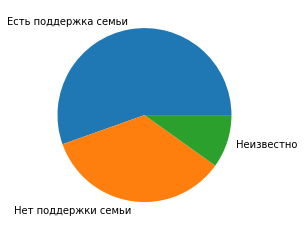

In [101]:
# изменим индекс для наглядности
Famsup.index = Famsup.index.map({"yes":"Есть поддержка семьи", 
                                 "no": "Нет поддержки семьи", 
                                 "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Famsup['famsup'], labels = Famsup.index)

#### Вывод: У большинства учащихся поддержка семьи есть.

### paid
#### В столбце есть пропуски

In [13]:
# заполним пропуски в столбце значением None
df['paid'] = df['paid'].fillna('None')

#### Распределение значений

In [102]:
Paid = pd.DataFrame(df.paid.value_counts())
Paid

,paid
no,200
yes,155
None,40


([<matplotlib.patches.Wedge at 0x7f08d61bfd90>,
 [Text(-0.021870424679261286, 1.0997825623841966, 'Нет доп. платных занятий'),
  Text(-0.32323526812677367, -1.0514366178895487, 'Есть доп. платные занятия'),
  Text(1.044802158255407, -0.3440762271718921, 'Неизвестно')])

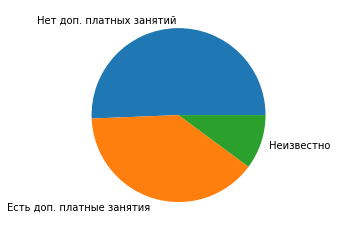

In [103]:
# изменим индекс для наглядности
Paid.index = Paid.index.map({"yes":"Есть доп. платные занятия", 
                             "no": "Нет доп. платных занятий", 
                             "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Paid['paid'], labels = Paid.index)

#### Вывод: Примерно у половины учащихся есть платные дополнительные занятия по математике.

### activities
#### В столбце есть пропуски

In [14]:
# заполним пропуски в столбце значением None
df['activities'] = df['activities'].fillna('None')

#### Распределение значений

In [104]:
Activities = pd.DataFrame(df.activities.value_counts())
Activities

,activities
yes,195
no,186
None,14


([<matplotlib.patches.Wedge at 0x7f08d61942d0>,
 [Text(0.021870424679261424, 1.0997825623841966, 'Есть внеучебные занятия'),
  Text(-0.14394023305205575, -1.0905417045252879, 'Нет внеучебных занятий'),
  Text(1.0931879856499367, -0.1222294073888682, 'Неизвестно')])

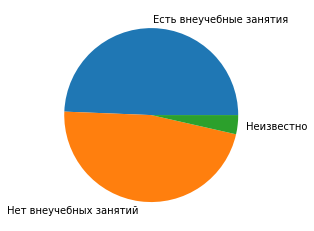

In [105]:
# изменим индекс для наглядности
Activities.index = Activities.index.map({"yes":"Есть внеучебные занятия", 
                                         "no": "Нет внеучебных занятий", 
                                         "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Activities['activities'], labels = Activities.index)

#### Вывод: по наличию внеучебных занятий учащиеся разделились примерно поровну

### nursery
#### В столбце есть пропуски

In [15]:
# заполним пропуски в столбце значением None
df['nursery'] = df['nursery'].fillna('None')

#### Распределение значений

In [106]:
Nursery = pd.DataFrame(df.nursery.value_counts())
Nursery

,nursery
yes,300
no,79
None,16


([<matplotlib.patches.Wedge at 0x7f08d6158ad0>,
 [Text(-0.8006666395585158, 0.7542764296317856, 'Посещали детский сад'),
  Text(0.6984663284208555, -0.8497910261130613, 'Не посещали детский сад'),
  Text(1.09110547285928, -0.13960246092575587, 'Неизвестно')])

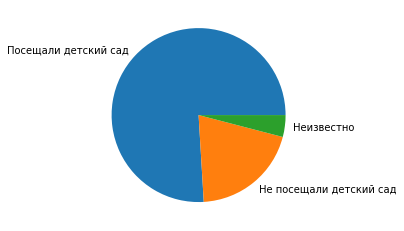

In [107]:
# изменим индекс для наглядности
Nursery.index = Nursery.index.map({"yes":"Посещали детский сад", 
                                   "no": "Не посещали детский сад", 
                                   "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Nursery['nursery'], labels = Nursery.index)

#### Вывод: Подавляющее большинство учащихся посещало детский сад

### higher
#### В столбце есть пропуски

In [16]:
# заполним пропуски в столбце значением None
df['higher'] = df['higher'].fillna('None')

#### Распределение значений

In [161]:
Higher = pd.DataFrame(df.higher.value_counts())
Higher

,higher
yes,356
None,20
no,19


([<matplotlib.patches.Wedge at 0x7f1d1fd86750>,
 [Text(-1.047505622781816, 0.3357558193694937, 'Хотят получить высшее образование'),
  Text(0.9850233964922576, -0.48962118863755977, 'nan'),
  Text(1.0874642699800994, -0.16559426776507033, 'Не хотят получить высшее образование')])

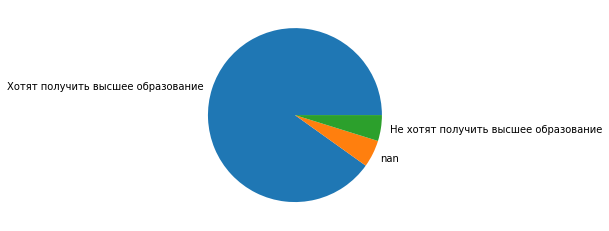

In [162]:
# изменим индекс для наглядности
Higher.index = Higher.index.map({"yes":"Хотят получить высшее образование", 
                                 "no": "Не хотят получить высшее образование",
                                 "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Higher['higher'], labels = Higher.index)

#### Вывод: Подавляющее большинство учащихся хочет получить высшее образование.

### internet
#### В столбце есть пропуски

In [17]:
# заполним пропуски в столбце значением None
df['internet'] = df['internet'].fillna('None')

#### Распределение значений

In [108]:
Internet = pd.DataFrame(df.internet.value_counts())
Internet

,internet
yes,305
no,56
None,34


([<matplotlib.patches.Wedge at 0x7f08d61282d0>,
 [Text(-0.8300210565091217, 0.7218483537083683, 'Есть интернет'),
  Text(0.6070292866121648, -0.917341509578154, 'Нет интернета'),
  Text(1.0600259392287932, -0.29384521122882873, 'Неизвестно')])

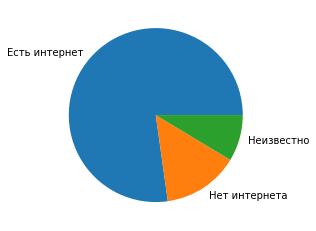

In [109]:
# изменим индекс для наглядности
Internet.index = Internet.index.map({"yes": "Есть интернет", 
                                     "no": "Нет интернета", 
                                     "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Internet['internet'], labels = Internet.index)

#### Вывод: У подавляющего числа учащихся есть интеренет.

### romantic
#### В столбце есть пропуски

In [18]:
# заполним пропуски в столбце значением None
df['romantic'] = df['romantic'].fillna('None')

#### Распределение значений

In [110]:
Romantic = pd.DataFrame(df.romantic.value_counts())
Romantic

,romantic
no,240
yes,124
None,31


([<matplotlib.patches.Wedge at 0x7f08d60efb10>,
 [Text(-0.36478111047556594, 1.0377546634153052, 'Нет отношений'),
  Text(0.10047005429701733, -1.0954021034257486, 'В романтических отношениях'),
  Text(1.0667347132353042, -0.26847169604782073, 'Неизвестно')])

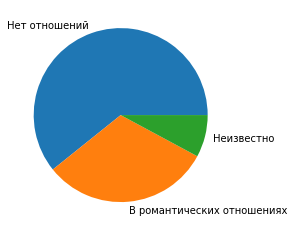

In [111]:
# изменим индекс для наглядности
Romantic.index = Romantic.index.map({"yes": "В романтических отношениях", 
                                     "no": "Нет отношений", 
                                     "None": "Неизвестно"})
fig, ax = plt.subplots()
ax.pie(Romantic['romantic'], labels = Romantic.index)

#### Вывод: Большинство учащихся не состоят в романтических отношениях

### Небинарные категориальные признаки

### mjob
#### В столбце есть пропуски

In [19]:
# заполним пропуски в столбце значением None
df['mjob'] = df['mjob'].fillna('None')

#### Распределение значений

In [188]:
Mjob = pd.DataFrame(df.mjob.value_counts())
Mjob

,mjob
other,133
services,98
at_home,58
teacher,55
health,32
None,19


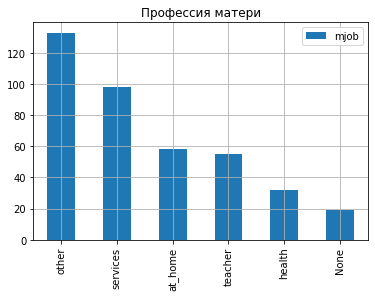

In [192]:
Mjob.plot(kind = 'bar',grid = True, title = 'Профессия матери')

#### Вывод: Большинство матерей учащихся занято в других проф.сферах и сервисе.

### Fjob
#### В столбце есть пропуски

In [193]:
# заполним пропуски в столбце значением None
df['fjob'] = df['fjob'].fillna('None')

#### Распределение значений

In [194]:
Fjob = pd.DataFrame(df.fjob.value_counts())
Fjob

,fjob
other,197
services,102
None,36
teacher,29
at_home,16
health,15


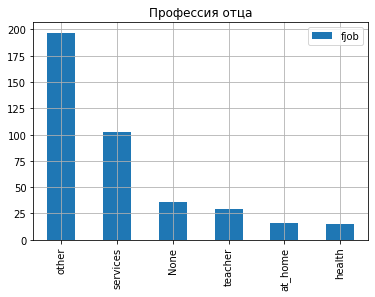

In [196]:
Fjob.plot(kind = 'bar',grid = True, title = 'Профессия отца')

#### Вывод: Большинство отцов учащихся занято в других проф.сферах и сервисе. 
#### Распределение проф.сфер у отцов и матерей имеет схожий характер.

### reason
#### В столбце есть пропуски

In [20]:
# заполним пропуски в столбце значением None
df['reason'] = df['reason'].fillna('None')

#### Распределение значений

In [200]:
Reason = pd.DataFrame(df.reason.value_counts())
Reason

,reason
course,137
home,104
reputation,103
other,34
None,17


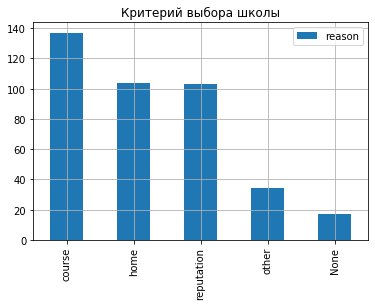

In [201]:
Reason.plot(kind = 'bar',grid = True, title = 'Критерий выбора школы')

#### Вывод: Образовательная программа, близость к дому и репутация школы были выбраны практически в равной степени. Образовательная программа лидирует с небольшим отрывом.

### guardian
#### В столбце есть пропуски

In [21]:
# заполним пропуски в столбце значением None
df['guardian'] = df['guardian'].fillna('None')

#### Распределение значений

In [205]:
Guardian = pd.DataFrame(df.guardian.value_counts())
Guardian

,guardian
mother,250
father,86
None,31
other,28


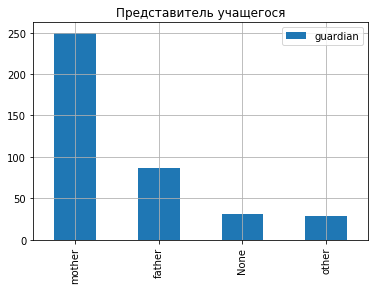

In [206]:
Guardian.plot(kind = 'bar',grid = True, title = 'Представитель учащегося')

#### Вывод: Подавляющее большинство учащихся представляет мать.

## Ранговые признаки

### Medu 
#### В столбце есть пропуски

In [25]:
# заполним пропуски новым значением - 5
Medu_ser = df.medu.fillna(5)

#### Распределение значений

In [26]:
Medu = pd.DataFrame(Medu_ser.value_counts().sort_index())
Medu

,medu
0.0,3
1.0,59
2.0,102
3.0,97
4.0,131
5.0,3


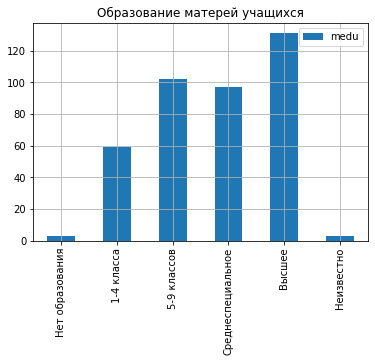

In [27]:
education = {0: 'Нет образования', 1: "1-4 класса", 2: "5-9 классов",
                             3: "Среднеспециальное", 4: "Высшее", 5: "Неизвестно"}
# изменим индекс для наглядности
Medu.index = Medu.index.map(education)
Medu.plot(kind = 'bar',grid = True, title = 'Образование матерей учащихся')

#### Вывод: У большинства матерей учащихся высшее образование

### fedu
#### В столбце есть пропуски

In [33]:
df.fedu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

#### Значение "40", скорее всего, опечатка значения "4"

In [34]:
# сделаем замену на 4
df.fedu[df.fedu[df.fedu == 40].index] = 4

/home/alyona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# заполним пропуски новым значением - 5
Fedu_ser = df.fedu.fillna(5)

#### Распределение значений

In [47]:
Fedu = pd.DataFrame(Fedu_ser.value_counts().sort_index())
Fedu

,fedu
0.0,2
1.0,78
2.0,106
3.0,96
4.0,89
5.0,24


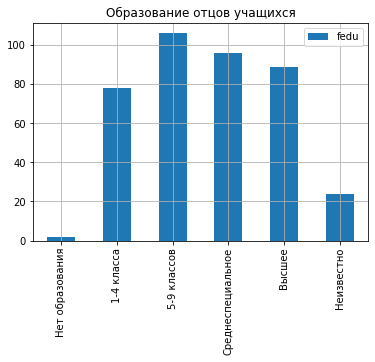

In [48]:
# изменим индекс для наглядности
Fedu.index = Fedu.index.map(education)
Fedu.plot(kind = 'bar',grid = True, title = 'Образование отцов учащихся')

#### Вывод: у большинства отцов образование 5-9 классов. Рапределение по категориям более ровное, чем у матерей, больше пропусков в данных. 

### traveltime
#### В столбце есть пропуски

In [43]:
# заполним пропуски новым значением - 5
Traveltime_ser = df.traveltime.fillna(5)

#### Распределение значений

In [44]:
Traveltime = pd.DataFrame(Traveltime_ser.value_counts().sort_index())
Traveltime

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7
5.0,28


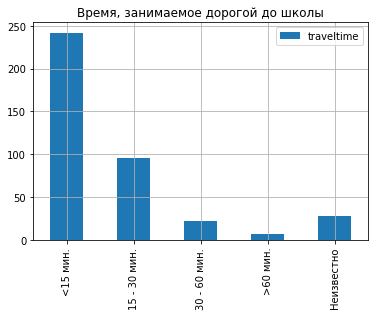

In [49]:
# изменим индекс для наглядности
Traveltime.index = Traveltime.index.map({1: "<15 мин.", 2: "15 - 30 мин.", 3: "30 - 60 мин.", 
                                         4: ">60 мин.", 5: "Неизвестно"})
Traveltime.plot(kind = 'bar',grid = True, title = 'Время, занимаемое дорогой до школы')

#### Вывод: Подавляющее большинство учащихся живёт недалеко от школы.

### studytime
#### В столбце есть пропуски

In [52]:
# заполним пропуски новым значением - 5
Studytime_ser = df.studytime.fillna(5)

#### Распределение значений

In [53]:
Studytime = pd.DataFrame(Studytime_ser.value_counts().sort_index())
Studytime

,studytime
1.0,103
2.0,194
3.0,64
4.0,27
5.0,7


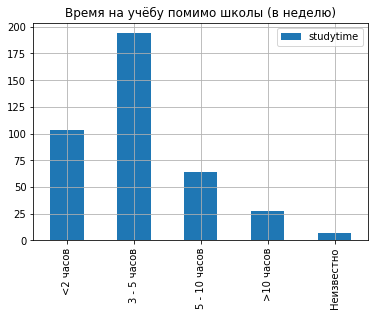

In [54]:
# изменим индекс для наглядности
Studytime.index = Studytime.index.map({1: "<2 часов", 2: "3 - 5 часов", 3: "5 - 10 часов", 
                                       4: ">10 часов", 5: "Неизвестно"})
Studytime.plot(kind = 'bar',grid = True, title = 'Время на учёбу помимо школы (в неделю)')

#### Вывод: У большинства учеников есть 3 - 5 часов в неделю на учёбу помимо школы.

### failures

#### В столбце есть пропуски

In [66]:
# заполним пропуски новым значением - 5
Failures_ser = df.failures.fillna(5)

#### Распределение значений

In [70]:
Failures = pd.DataFrame(Failures_ser.value_counts().sort_index())
Failures

,failures
0.0,293
1.0,49
2.0,16
3.0,15
5.0,22


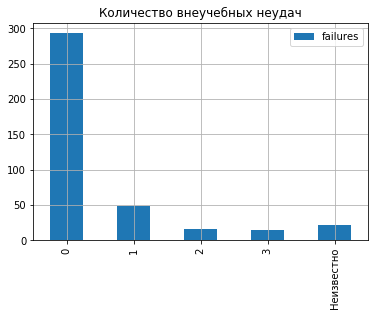

In [71]:
# изменим индекс для наглядности
Failures.index = Failures.index.map({0: 0, 1: 1, 2: 2, 3: 3, 5: "Неизвестно"})
Failures.plot(kind = 'bar',grid = True, title = 'Количество внеучебных неудач')

#### Вывод: Подавляющее большинство учеников не имеет внеучебных неудач.  

### famrel
#### В столбце есть пропуски

In [72]:
df.famrel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

#### Значение "-1", скорее всего, опечатка значения "1"

In [73]:
# сделаем замену на 1
df.famrel[df.famrel[df.famrel == -1].index] = 1

/home/alyona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
# заполним пропуски новым значением - 6
Famrel_ser = df.famrel.fillna(6)

#### Распределение значений

In [87]:
Famrel = pd.DataFrame(Famrel_ser.value_counts().sort_index())
Famrel

,famrel
1.0,8
2.0,17
3.0,62
4.0,182
5.0,99
6.0,27


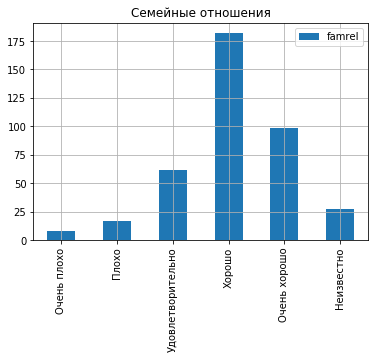

In [88]:
scale = {1: "Очень плохо", 2: "Плохо", 3: "Удовлетворительно", 4: "Хорошо",5: "Очень хорошо", 6: "Неизвестно"}
# изменим индекс для наглядности
Famrel.index = Famrel.index.map(scale) 
Famrel.plot(kind = 'bar',grid = True, title = 'Семейные отношения')

#### Вывод: У подавляющего большинства учащихся хорошие и очень хорошие внутрисемейные отношения.

### freetime
#### В столбце есть пропуски

In [81]:
# заполним пропуски новым значением - 6
Freetime_ser = df.freetime.fillna(6)

#### Распределение значений

In [90]:
Freetime = pd.DataFrame(Freetime_ser.value_counts().sort_index())
Freetime

,freetime
1.0,18
2.0,63
3.0,153
4.0,112
5.0,38
6.0,11


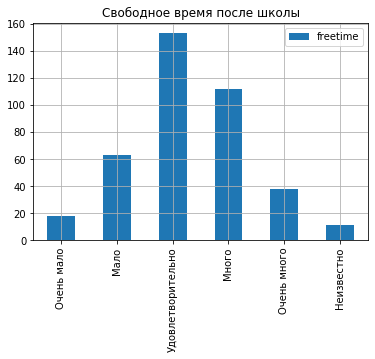

In [91]:
time = {1: "Очень мало", 2: "Мало", 3: "Удовлетворительно", 4: "Много",5: "Очень много", 6: "Неизвестно"}
# изменим индекс для наглядности
Freetime.index = Freetime.index.map(time)
Freetime.plot(kind = 'bar',grid = True, title = 'Свободное время после школы')

#### Вывод: У подавляющего большинства учащихся достаточно свободного времени после школы.

### goout
#### В столбце есть пропуски

In [84]:
# заполним пропуски новым значением - 6
Goout_ser = df.goout.fillna(6)

#### Распределение значений

In [112]:
Goout = pd.DataFrame(Goout_ser.value_counts().sort_index())
Goout

,goout
1.0,23
2.0,101
3.0,127
4.0,84
5.0,52
6.0,8


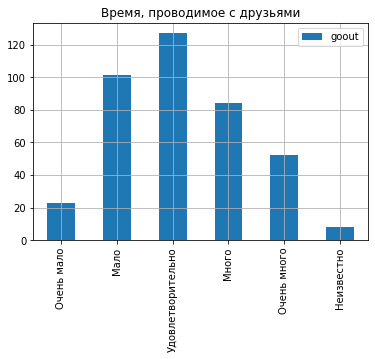

In [113]:
# изменим индекс для наглядности
Goout.index = Goout.index.map(time)
Goout.plot(kind = 'bar',grid = True, title = 'Время, проводимое с друзьями')

#### Вывод: Подавляющее большинство учащихся достаточно времени проводит с друзьями.

### health
#### В столбце есть пропуски

In [114]:
# заполним пропуски новым значением - 6
Health_ser = df.health.fillna(6)

In [117]:
Health = pd.DataFrame(Health_ser.value_counts().sort_index())
Health

,health
1.0,47
2.0,43
3.0,89
4.0,63
5.0,138
6.0,15


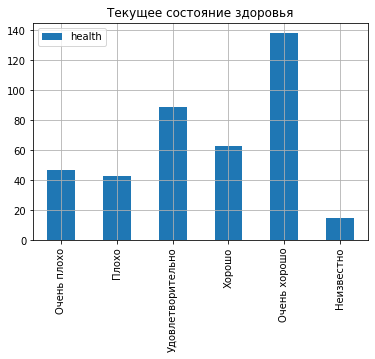

In [118]:
#заменим индекс для наглядности
Health.index = Health.index.map(scale) 
Health.plot(kind = 'bar',grid = True, title = 'Текущее состояние здоровья')

#### Вывод: У большинства учащихся хорошее и очень хорошее здоровье.

## Численные признаки

### granular
#### Единственный столбец с отрицательными значениями в датафрейме

#### Распределение значений

In [139]:
pd.DataFrame(df.granular.value_counts().sort_index())

,granular
-12.0,27
-9.0,63
-6.0,187
-3.0,103


####  Вывод: Представляет из себя столбец studytime умноженный на -3.
#### Не вносит вклада в модель, поэтому удалим его.

In [140]:
df = df.drop(['granular'], axis = 1)

### age
#### В столбце нет пропусков

#### Распределение значений

In [120]:
pd.DataFrame(df.age.value_counts().sort_index())

,age
15,82
16,104
17,98
18,82
19,24
20,3
21,1
22,1


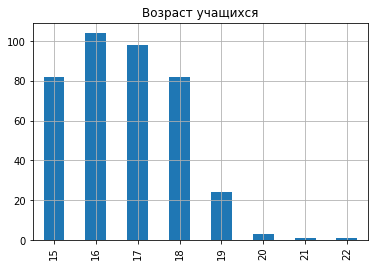

In [122]:
df.age.value_counts().sort_index().plot(kind = 'bar',grid = True, title = 'Возраст учащихся')

#### Вывод: Основная возрастная группа учащихся от 15 до 18 лет. Выбросов нет.

### absences
#### В столбце есть пропуски

#### Распределение значений

In [124]:
Absences = pd.DataFrame(df.absences.value_counts().sort_index())
Absences

,absences
0.0,111
1.0,3
2.0,60
3.0,8
4.0,53
5.0,5
6.0,31
7.0,6
8.0,21
9.0,3


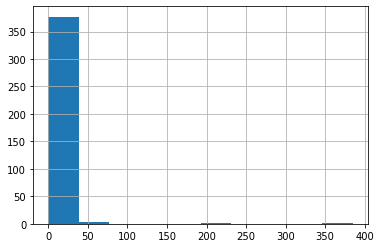

In [125]:
df.absences.hist()

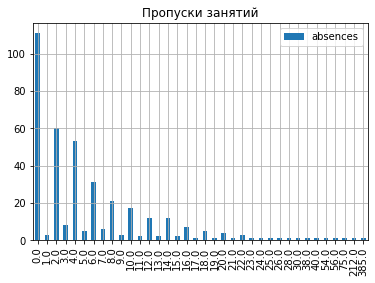

In [130]:
Absences.plot(kind = 'bar',grid = True, title = 'Пропуски занятий')

#### Вывод: Значения признака в основном сосредоточены в диапазоне от 0 до 40. Значения "212" и "385" будем считать выбросами. 
#### Необычный вид распределения с небольшим количеством значений на нечётных числах можжно объяснить тем, что занятия проводятся в виде пар, а учащиеся, как правило, пропускают сразу целую пару.

#### Удалим строки с выбросами:

In [126]:
df.absences[(df.absences == 212) | (df.absences == 385)].index

Int64Index([222, 390], dtype='int64')

In [127]:
df = df.drop([222, 390], axis = 0)

### score
#### В столбце есть пропуски, которые нужно удалить, т. к. score - целевая переменная

In [146]:
df = df.dropna(subset = ['score'])

#### Распределение значений

In [133]:
Score = pd.DataFrame(df.score.value_counts().sort_index())
Score

,score
0.0,37
20.0,1
25.0,7
30.0,15
35.0,9
40.0,31
45.0,26
50.0,54
55.0,46
60.0,31


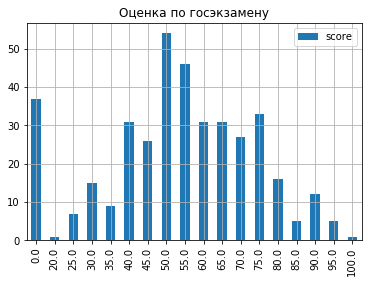

In [141]:
Score.plot(kind = 'bar',grid = True, title = 'Оценка по госэкзамену')

#### Вывод: Распределение значений близко к нормальному, за исключением большого количества значений "0".
#### Если бы "0" была оценкой за госэкзамен, мы бы имели от силы несколько таких случаев, следовательно есть какие-то причины, по которым учащиеся получили "0" баллов (например, неявка на экзамен)
#### Обратим внимание, что почти все, кто получил "0" не пропустили ни одного занятия по математике.

In [147]:
df.absences[df.score == 0].value_counts()

0.0    36
Name: absences, dtype: int64

#### Удалим все строки с оценкой "0" из датафрейма, кроме одной:

In [158]:
index_null = df.absences[df.score == 0].index[1:]
df = df.drop(index = index_null)

## Анализ категориальных переменных

### Построение графиков типа boxplot

In [163]:
def get_boxplot(column):
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='score', 
                data=df)
    ax.set_title('Boxplot for ' + column)
    plt.show()

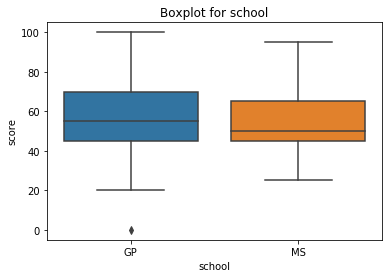

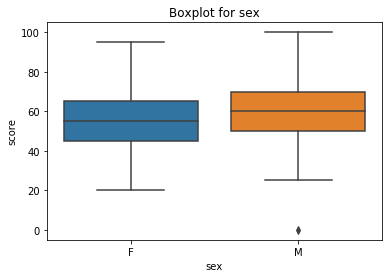

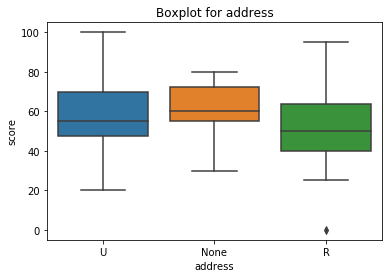

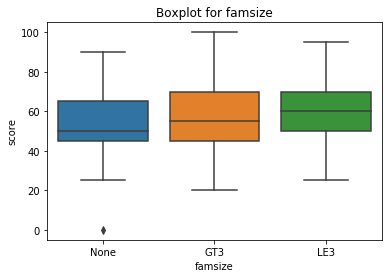

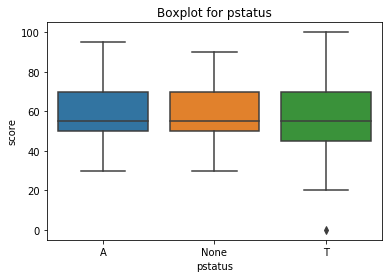

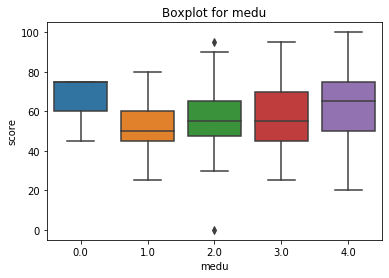

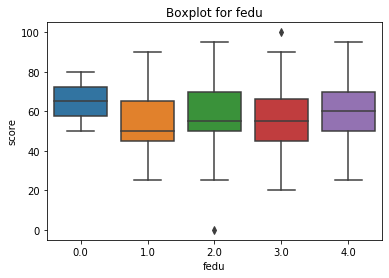

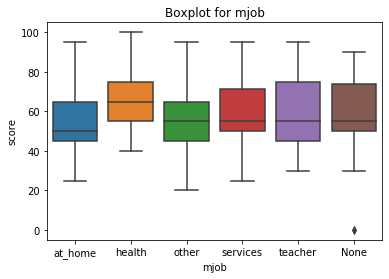

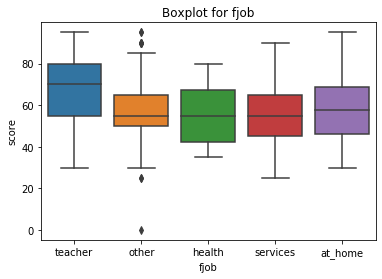

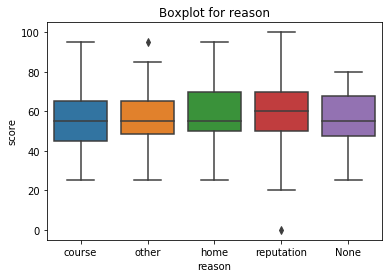

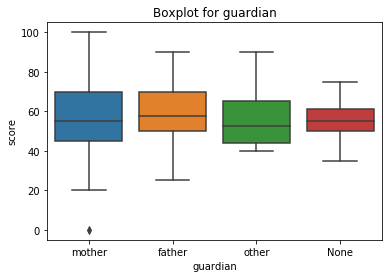

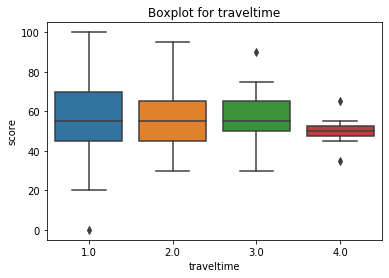

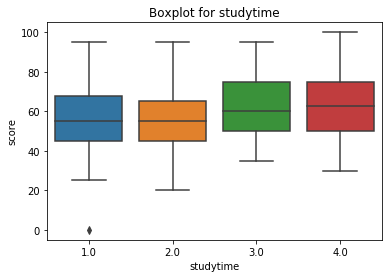

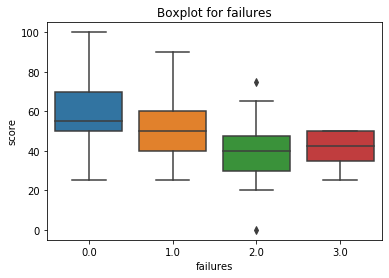

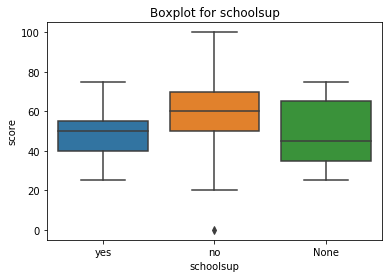

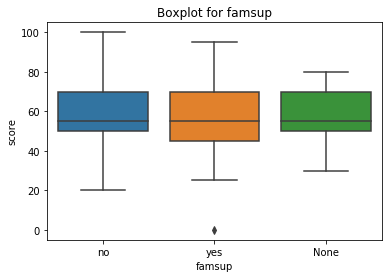

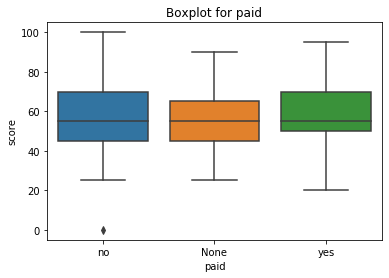

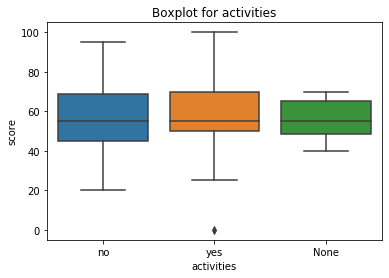

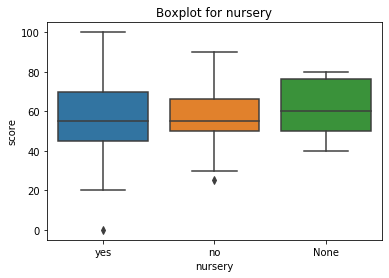

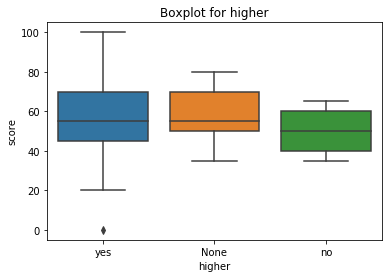

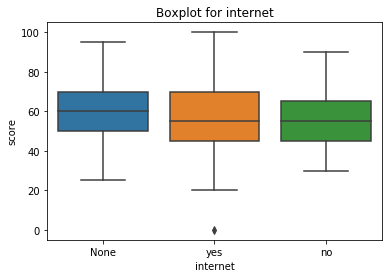

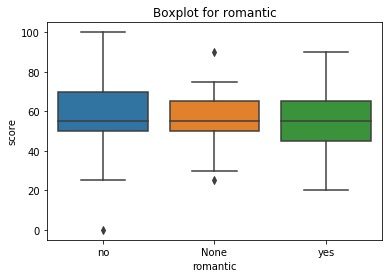

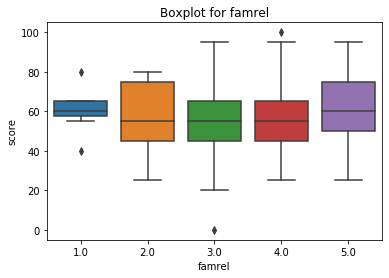

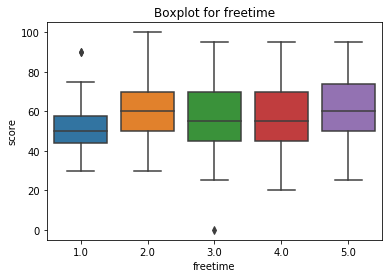

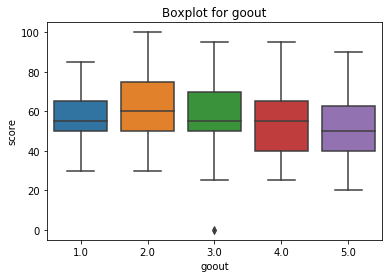

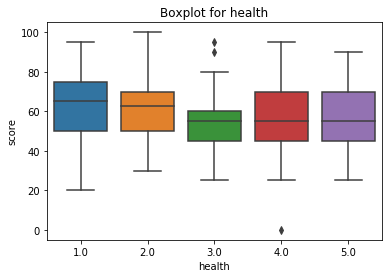

In [164]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

#### Вывод: Оценивая графики визуально, можно предположить, что на целевую переменную наибольшее влияние оказывают признаки:
- address
- medu, 
- fedu, 
- mjob, 
- fjob, 
- studytime, 
- failures, 
- schoolsup, 
- famrel, 
- freetime, 
- goout.

#### Проверим, есть ли статистическая разница в распределении оценок по категориальным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [165]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break        

In [167]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


#### По результатам теста статистически значимыми показателями являются:
- address
- medu
- fedu
- mjob
- studytime
- failures
- schoolsup
- goout

## Признаки, отобранные для дальнейшего построения модели:

- age
- absences
- address
- fedu
- mjob
- studytime
- failures
- scoolsup
- goout

In [169]:
df_for_model = df.loc[:, ['age', 'address', 'medu', 'fedu',
       'mjob','studytime', 'failures', 'schoolsup',
        'goout','absences', 'score']]
df_for_model.head()

,age,address,medu,fedu,mjob,studytime,failures,schoolsup,goout,absences,score
0,18,U,4.0,4.0,at_home,2.0,0.0,yes,4.0,6.0,30.0
1,17,U,1.0,1.0,at_home,2.0,0.0,no,3.0,4.0,30.0
2,15,U,1.0,1.0,at_home,2.0,3.0,yes,2.0,10.0,50.0
3,15,U,4.0,2.0,health,3.0,0.0,no,2.0,2.0,75.0
4,16,U,3.0,3.0,other,2.0,0.0,no,2.0,4.0,50.0


## Выводы:

#### В результате EDA для анализа влияния информации об учащихся на оценку госэкзамена по математике были получены следующие выводы:

 - В данных достаточно мало пустых значений.
 - Выбросы найдены только в столбцах fedu, famrel и score, что позволяет сделать вывод о том, что данные достаточно чистые.
 - Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: age, absences, address, fedu, mjob, studytime, failures, scoolsup, goout.